In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
from IPython import display
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline

In [3]:
def printmd(s):
    display.display(display.Markdown(s))
    
sns.set_style('darkgrid')
sns.set_palette("pastel")

## Upload data

In [4]:
TRAIN = 'Data/train.csv'
TEST = 'Data/test.csv'
TEST_LABEL = 'Data/test_labels.csv'

In [5]:
df_train = pd.read_csv(TRAIN)
df_test = pd.read_csv(TEST)
df_label = pd.read_csv(TEST_LABEL)

In [6]:
printmd('**Train data:**')
print(df_train.info())

printmd('**Test data:**')
print(df_test.info())

printmd('**Test labels:**')
print(df_label.info())

**Train data:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


**Test data:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
None


**Test labels:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             153164 non-null  object
 1   toxic          153164 non-null  int64 
 2   severe_toxic   153164 non-null  int64 
 3   obscene        153164 non-null  int64 
 4   threat         153164 non-null  int64 
 5   insult         153164 non-null  int64 
 6   identity_hate  153164 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.2+ MB
None


In [7]:
# join test comments texts with their labels

df_test_with_labels = pd.merge(df_test, df_label, on='id')
print(df_test_with_labels.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153164 entries, 0 to 153163
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             153164 non-null  object
 1   comment_text   153164 non-null  object
 2   toxic          153164 non-null  int64 
 3   severe_toxic   153164 non-null  int64 
 4   obscene        153164 non-null  int64 
 5   threat         153164 non-null  int64 
 6   insult         153164 non-null  int64 
 7   identity_hate  153164 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 10.5+ MB
None


## Data exploration

In [8]:
printmd('**Train data:**')
display.display(df_train.head())

printmd('**Test data:**')
display.display(df_test_with_labels.head())

**Train data:**

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


**Test data:**

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1


In [9]:
printmd('**Classes distribution (%)**')

printmd('*Train data:*')
for cl in df_train.columns[2:]:
    display.display(df_train[cl].value_counts(normalize=True))

printmd('*Test data:*')
for cl in df_test_with_labels.columns[2:]:
    display.display(df_test_with_labels[cl].value_counts(normalize=True))

**Classes distribution (%)**

*Train data:*

0    0.904156
1    0.095844
Name: toxic, dtype: float64

0    0.990004
1    0.009996
Name: severe_toxic, dtype: float64

0    0.947052
1    0.052948
Name: obscene, dtype: float64

0    0.997004
1    0.002996
Name: threat, dtype: float64

0    0.950636
1    0.049364
Name: insult, dtype: float64

0    0.991195
1    0.008805
Name: identity_hate, dtype: float64

*Test data:*

-1    0.582291
 0    0.377948
 1    0.039761
Name: toxic, dtype: float64

-1    0.582291
 0    0.415313
 1    0.002396
Name: severe_toxic, dtype: float64

-1    0.582291
 0    0.393611
 1    0.024098
Name: obscene, dtype: float64

-1    0.582291
 0    0.416332
 1    0.001378
Name: threat, dtype: float64

-1    0.582291
 0    0.395334
 1    0.022375
Name: insult, dtype: float64

-1    0.582291
 0    0.413061
 1    0.004649
Name: identity_hate, dtype: float64

**Note:** According to data description on Kaggel `value of -1 in test data indicates that it was not used for scoring` (https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data)

#### Check classes intersection

**Train data**

posx and posy should be finite values
posx and posy should be finite values


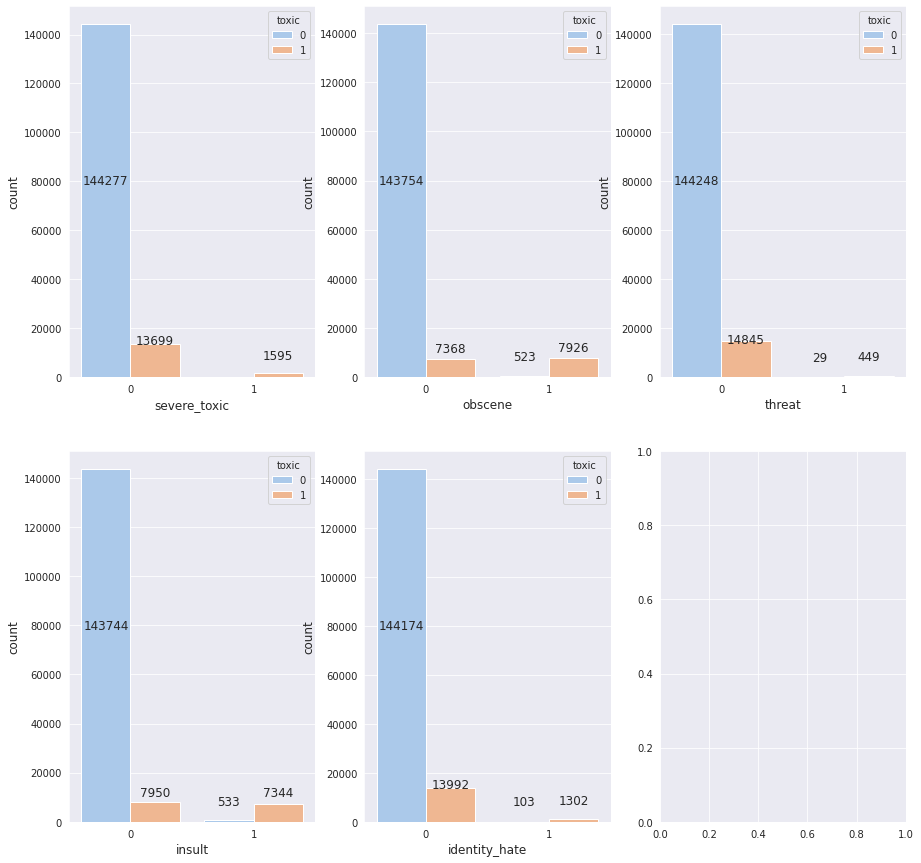

In [11]:
printmd('**Train data**') 

fig, ax = plt.subplots(2, 3, figsize=(15, 15))

for i,l in enumerate(df_train.columns[3:]):
    _ = sns.countplot(x=l, hue='toxic', data=df_train, ax=ax[i // 3, i % 3])
    ax[i // 3, i % 3].set_xlabel(l, fontsize=12)
    ax[i // 3, i % 3].set_ylabel('count', fontsize=12)

for a1 in ax:
    for a2 in a1:
        for p in a2.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            a2.text(x+width/2, 
                    y+height/2 + 8000, 
                    '{:.0f}'.format(height), 
                    horizontalalignment='center', 
                    verticalalignment='center', fontsize=12)   
plt.show()

**Test data**

posx and posy should be finite values
posx and posy should be finite values


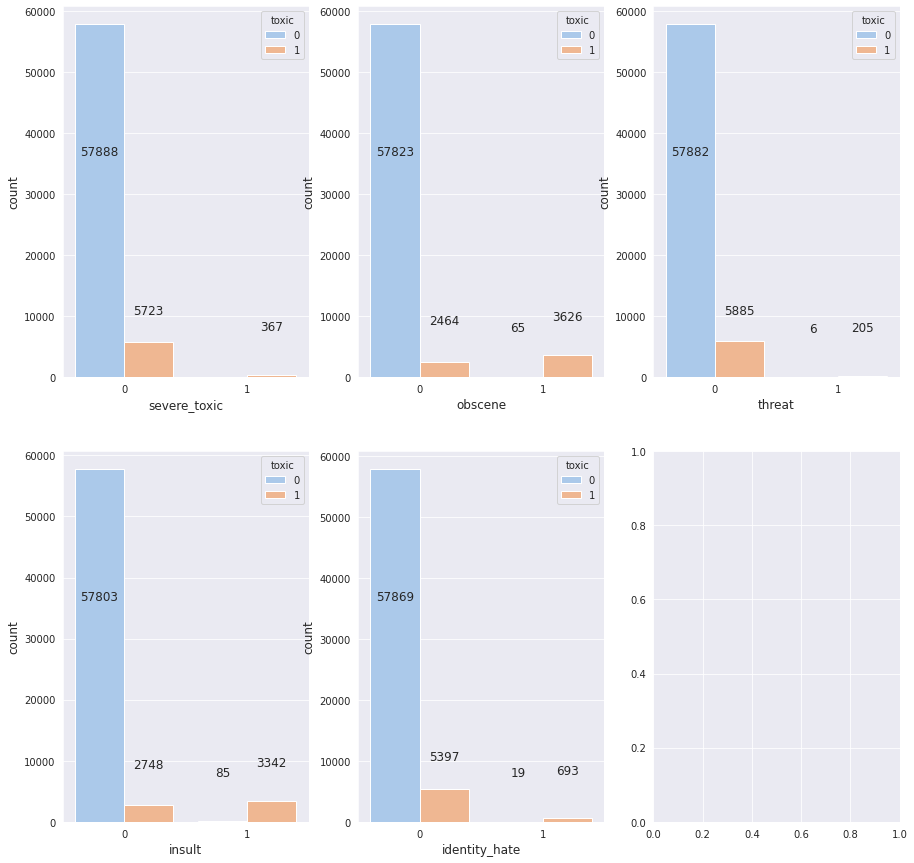

In [13]:
printmd('**Test data**')

fig, ax = plt.subplots(2, 3, figsize=(15, 15))

for i,l in enumerate(df_test_with_labels.columns[3:]):
    _ = sns.countplot(x=l, hue='toxic', data=df_test_with_labels[df_test_with_labels['toxic'] != -1], 
                      ax=ax[i // 3, i % 3])
    ax[i // 3, i % 3].set_xlabel(l, fontsize=12)
    ax[i // 3, i % 3].set_ylabel('count', fontsize=12)

for a1 in ax:
    for a2 in a1:
        for p in a2.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            a2.text(x+width/2, 
                    y+height/2 + 8000, 
                    '{:.0f}'.format(height), 
                    horizontalalignment='center', 
                    verticalalignment='center', fontsize=12)

plt.show()

### Texts initial analysis

In [14]:
# check if there are duplicates

printmd('**Train data:**')
if df_train.shape[0] == df_train.drop_duplicates('comment_text').shape[0]:
    print('NO text duplicates')
else:
    print('~ #duplicates:', df_train.shape[0] - df_train.drop_duplicates('comment_text').shape[0])
    
printmd('**Test data:**')
if df_test_with_labels.shape[0] == df_test_with_labels.drop_duplicates('comment_text').shape[0]:
    print('NO text duplicates')
else:
    print('~ #duplicates:', 
          df_test_with_labels.shape[0] - df_test_with_labels.drop_duplicates('comment_text').shape[0])

**Train data:**

NO text duplicates


**Test data:**

NO text duplicates


**<p style="text-align: center;">The most commonly used words in normal and toxic texts </p>**

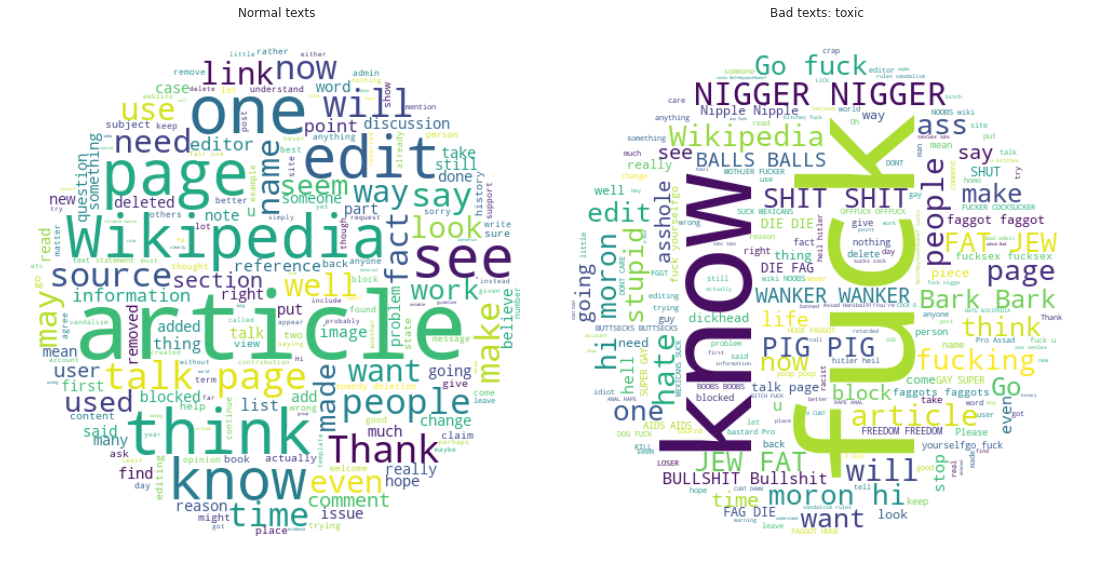

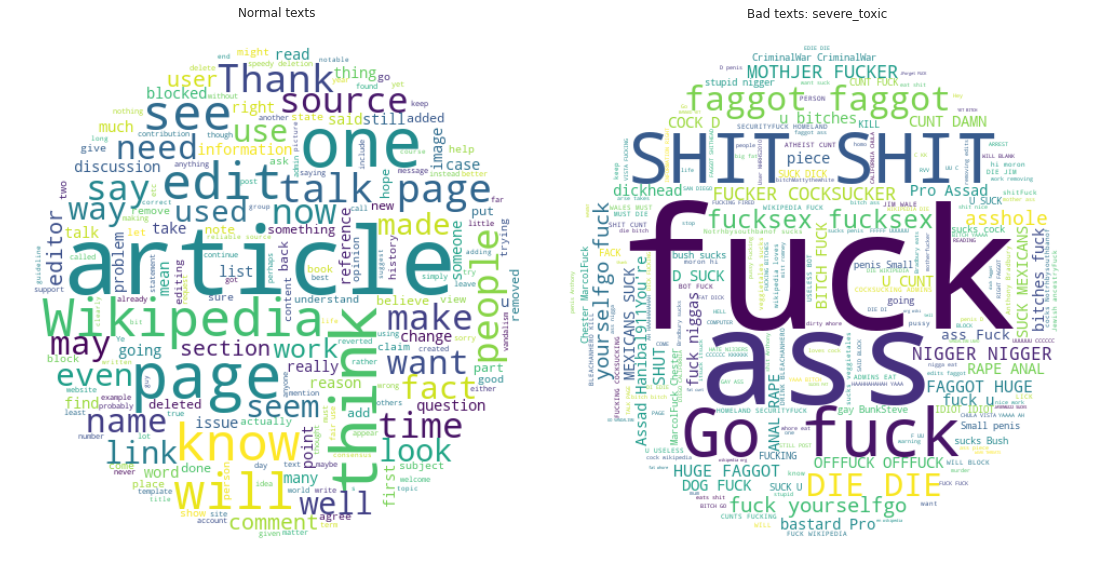

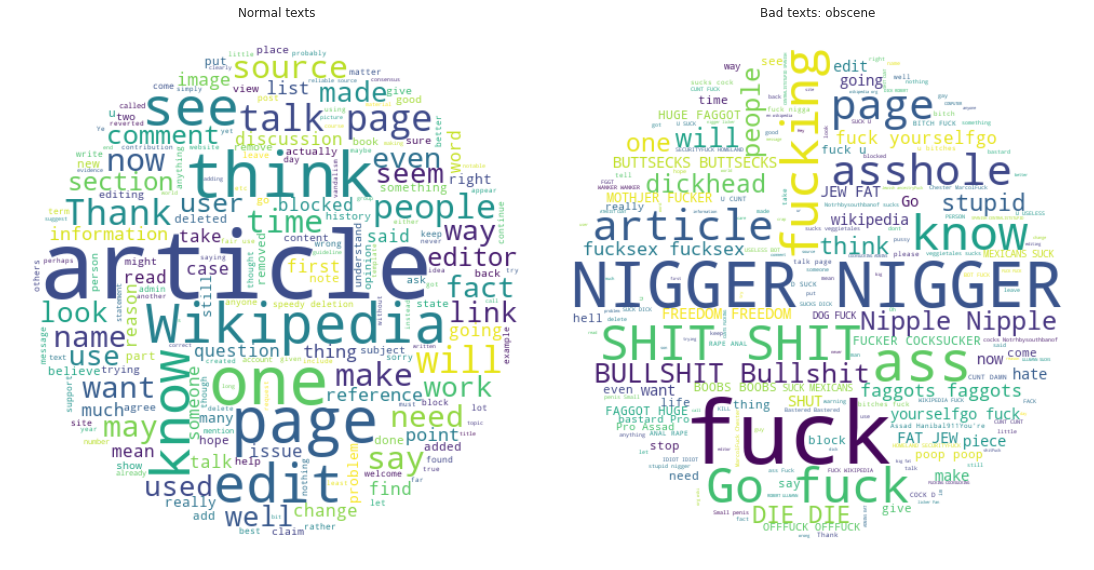

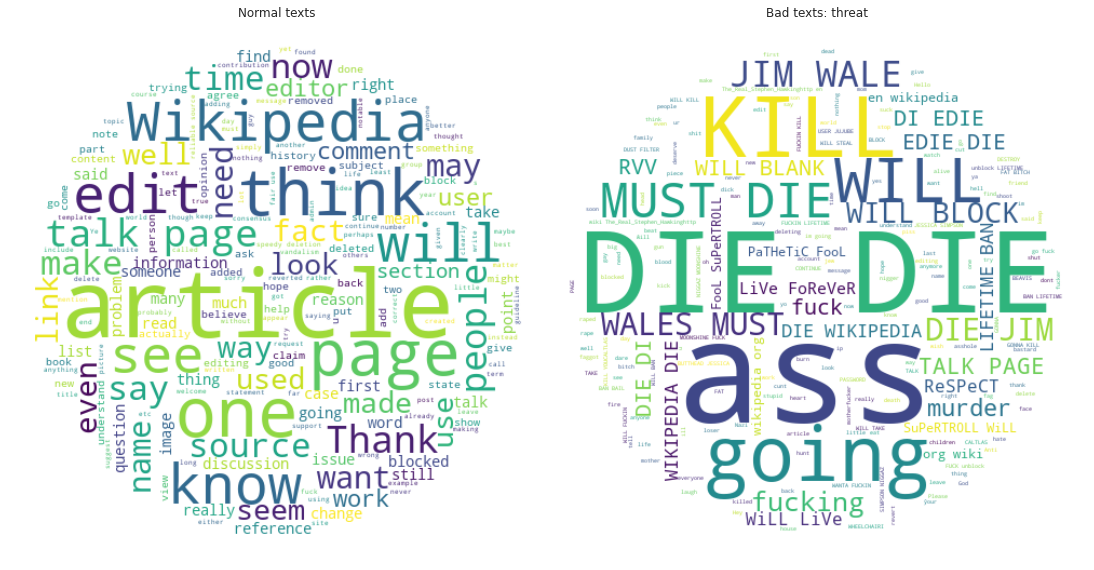

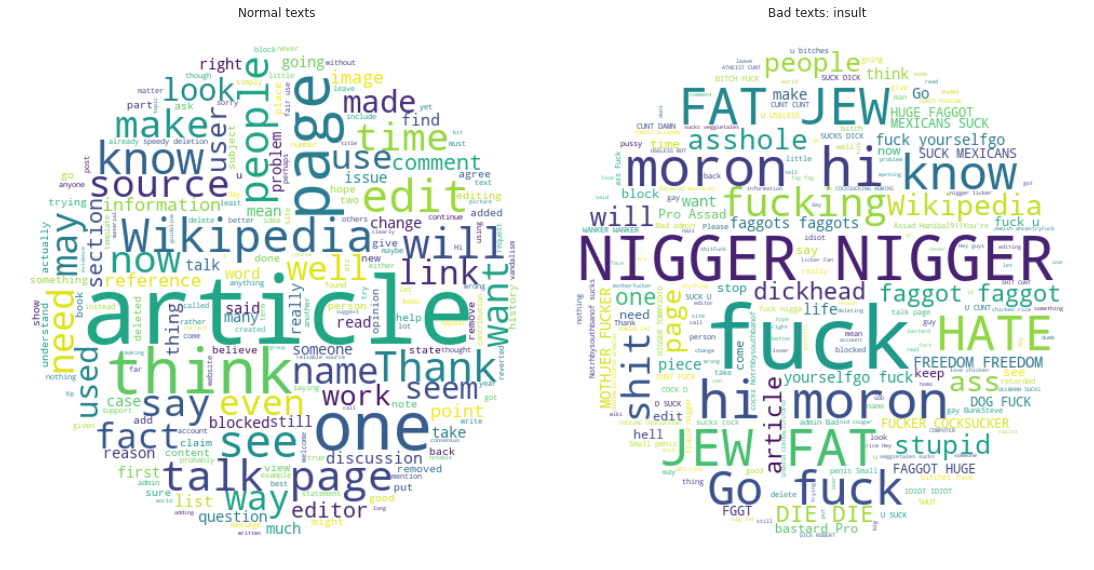

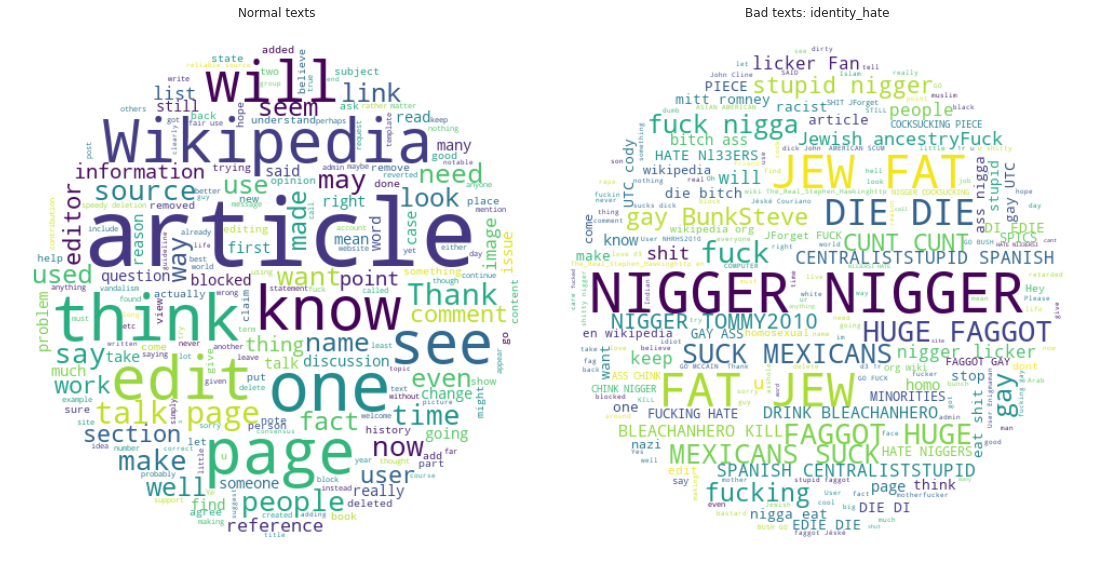

In [15]:
# the most common word per class

printmd('**<p style="text-align: center;">The most commonly used words in normal and toxic texts </p>**')
x, y = np.ogrid[:500, :500]
mask = (x - 250) ** 2 + (y - 250) ** 2 > 230 ** 2
mask = 255 * mask.astype(int)

for cl in df_train.columns[2:]:
    
    text_0 = ' '.join(df_train[df_train[cl] == 0]['comment_text'].values)
    text_1 = ' '.join(df_train[df_train[cl] == 1]['comment_text'].values)
    
    wc_0 = WordCloud(background_color="white", mask=mask).generate(text_0)
    wc_1 = WordCloud(background_color="white", mask=mask).generate(text_1)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 15))
    ax[0].imshow(wc_0, interpolation="bilinear")
    ax[1].imshow(wc_1, interpolation="bilinear")
    ax[0].axis("off")
    ax[1].axis("off")
    ax[0].set_title('Normal texts')
    ax[1].set_title('Bad texts: ' + str(cl))
    
    plt.tight_layout(pad=0)
    plt.show()

### Baseline solution: Bag-of-words + Naive Bayes

**Note:** Column `toxic` is used as target column

In [16]:
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from sklearn import feature_selection, metrics

nltk.download('wordnet')
nltk.download('stopwords')
stopwords_en = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/khranishak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/khranishak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [18]:
train_data = df_train[['comment_text', 'toxic']]
test_data = df_test_with_labels[df_test_with_labels['toxic'] != -1][['comment_text', 
                                                                           'toxic']].reset_index(drop=True)

In [20]:
train_data["text_clean"] = train_data['comment_text'].apply(utils_preprocess_text, lst_stopwords=stopwords_en)
test_data["text_clean"] = test_data['comment_text'].apply(utils_preprocess_text, 
                                                                      lst_stopwords=stopwords_en)

printmd('**Example:**')

printmd('*Original text:*')
print(train_data.loc[3, 'comment_text'])
printmd('*Clean text:*')
print(train_data.loc[3, "text_clean"])


/home/khranishak/PycharmProjects/ML_project/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Example:**

*Original text:*

"
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.

There appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "


*Clean text:*

cant make real suggestion improvement wondered section statistic later subsection type accident think reference may need tidying exact format ie date format etc later noone else first preference formatting style reference want please let know appears backlog article review guess may delay reviewer turn listed relevant form eg wikipediagood_article_nominationstransport


In [21]:
## split dataset to train and validation
dtf_train, dtf_val = model_selection.train_test_split(train_data, test_size=0.3, random_state=42, 
                                                       stratify=train_data["toxic"])
## get target
y_train = dtf_train["toxic"].values
y_val = dtf_val["toxic"].values

print('Train size: ', dtf_train.shape[0])
print('Test size: ', dtf_val.shape[0])
print('\n')
print('Train true positive rate:', dtf_train[dtf_train["toxic"] == 1].shape[0] / dtf_train.shape[0])
print('Test true positive rate:', dtf_val[dtf_val["toxic"] == 1].shape[0] / dtf_val.shape[0])

Train size:  111699
Test size:  47872


Train true positive rate: 0.09584687418866776
Test true positive rate: 0.09583890374331551


In [ ]:
# # save data for futher experiments

# dtf_train.to_pickle('Data/for_models/train_data.pkl')
# dtf_test.to_pickle('Data/for_models/test_data.pkl')

In [28]:
test_data.to_pickle('Data/for_models/validation_data.pkl')

In [22]:
## Count (classic BoW)
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

## Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

corpus = dtf_train["text_clean"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [23]:
print(X_train.shape)

(111699, 10000)


#### Feature selection

In [24]:
y = dtf_train['toxic']
X_names = vectorizer.get_feature_names()
p_value_limit = 0.95
df_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==cat)
    df_features = df_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    df_features = df_features.sort_values(["y","score"], 
                    ascending=[True,False])
    df_features = df_features[df_features["score"]>p_value_limit]
X_names = df_features["feature"].unique().tolist()

for cat in np.unique(y):
    print("# {}:".format(cat))
    print("  . selected features:",
         len(df_features[df_features["y"]==cat]))
    print("  . top features:", ",".join(
df_features[df_features["y"]==cat]["feature"].values[:10]))
    print(" ")

# 0:
  . selected features: 1712
  . top features: anal,arse,article,as,asshole,bag,ball,bastard,bitch,bloody
 
# 1:
  . selected features: 1712
  . top features: anal,arse,article,as,asshole,bag,ball,bastard,bitch,bloody
 


In [25]:
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [38]:
classifier = naive_bayes.MultinomialNB()
## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
## train classifier
model["classifier"].fit(X_train, y_train)

## validation
X_val = dtf_val["text_clean"].values
predicted_val = model.predict(X_val)
predicted_prob_val = model.predict_proba(X_val)[:, 1]

In [29]:
## test
X_test = test_data["text_clean"].values
predicted_test = model.predict(X_test)
predicted__prob_test = model.predict_proba(X_test)[:, 1]

**<p style="text-align: center;">Train metrics </p>**

Accuracy: 0.96
AUC: 0.96
Detail:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    100993
           1       0.90      0.60      0.72     10706

    accuracy                           0.96    111699
   macro avg       0.93      0.80      0.85    111699
weighted avg       0.95      0.96      0.95    111699



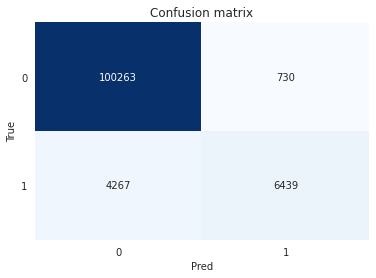

In [34]:
printmd('**<p style="text-align: center;">Train metrics </p>**')
classes = np.unique(y_train)
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_train, model["classifier"].predict(X_train))
auc = metrics.roc_auc_score(y_train, model["classifier"].predict_proba(X_train)[:, 1])
print("Accuracy:",  round(accuracy,2))
print("AUC:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_train, model["classifier"].predict(X_train)))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_train, model["classifier"].predict(X_train))
fig, ax = plt.subplots()
_ = sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

plt.show()

**<p style="text-align: center;">Validation metrics </p>**

Accuracy: 0.95
AUC: 0.95
Detail:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43284
           1       0.90      0.59      0.71      4588

    accuracy                           0.95     47872
   macro avg       0.93      0.79      0.84     47872
weighted avg       0.95      0.95      0.95     47872



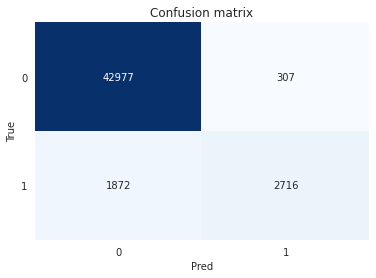

In [35]:
printmd('**<p style="text-align: center;">Validation metrics </p>**')

classes = np.unique(y_val)
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_val, predicted_val)
auc = metrics.roc_auc_score(y_val, predicted_prob_val)
print("Accuracy:",  round(accuracy,2))
print("AUC:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_val, predicted_val))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_val, predicted_val)
fig, ax = plt.subplots()
_ = sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

plt.show()

**<p style="text-align: center;">Test metrics </p>**

Accuracy: 0.93
AUC: 0.95
Detail:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     57888
           1       0.65      0.67      0.66      6090

    accuracy                           0.93     63978
   macro avg       0.81      0.81      0.81     63978
weighted avg       0.93      0.93      0.93     63978



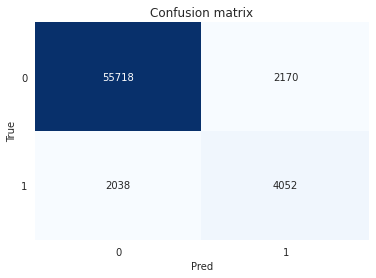

In [37]:
printmd('**<p style="text-align: center;">Test metrics </p>**')
y_test = test_data["toxic"].values
classes = np.unique(y_test)
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted_test)
auc = metrics.roc_auc_score(y_test, predicted__prob_test)
print("Accuracy:",  round(accuracy,2))
print("AUC:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted_test))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted_test)
fig, ax = plt.subplots()
_ = sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

plt.show()

### Save the model

In [40]:
import joblib

In [41]:
joblib.dump(model, '/home/khranishak/PycharmProjects/ML_project/Data/models/NB_classifier.pkl')

['/home/khranishak/PycharmProjects/ML_project/Data/models/NB_classifier.pkl']